Importing libraries 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 


Reading Data 

In [2]:
df=pd.read_csv('data/stud.csv')

Show 5 records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of Data set

In [4]:
df.shape

(1000, 8)

Data Check Performs
* Check Missing Values 
* Check Duplicates
* Check Data Types
* Check Number Of Unique Values
* Check stats of data set
* Check cate in present in different columns 



In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
x=df.columns
for i in x:
    print(str(i)+"   values Dtypes: -> "+str(df[i].dtypes))

gender   values Dtypes: -> object
race_ethnicity   values Dtypes: -> object
parental_level_of_education   values Dtypes: -> object
lunch   values Dtypes: -> object
test_preparation_course   values Dtypes: -> object
math_score   values Dtypes: -> int64
reading_score   values Dtypes: -> int64
writing_score   values Dtypes: -> int64


In [9]:
#differentiating btw numeric and categorical features
cat=[]
col=df.columns
numeric=df.select_dtypes('number').columns
print("Numeric ",numeric)
for i in col:
   if i in numeric:
      continue
   else:
    cat.append(i)
print(cat)

Numeric  Index(['math_score', 'reading_score', 'writing_score'], dtype='object')
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Checking Unique Valeus in Categories|

In [10]:
df.nunique()




gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Stats 

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Checking Unique Valeus in Categories |->2

In [12]:

print('gender :',df['gender'].unique())
print('race_ethnicity :',df['race_ethnicity'].unique())
print('parental_level_of_education :',df['parental_level_of_education'].unique())
print('lunch :',df['lunch'].unique())
print('test_preparation_course :',df['test_preparation_course'].unique())
    
       

gender : ['female' 'male']
race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch : ['standard' 'free/reduced']
test_preparation_course : ['none' 'completed']


Observations :We have 5 cat and 3 numeric feature 

Adding the features making average and total submission of 3 scores  

In [14]:
df['Total Score']=df['reading_score']+ df['math_score'] +df['writing_score']
df['Average Score']=df['Total Score']/3


In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Gettign the Studenst Who got full marks and who got no of students 

In [17]:
reading_full_std=df[df['reading_score']== 100]['Average Score'].count()
writing_full_std=df[df['writing_score']==100]['Average Score'].count()
math_score_full_std=df[df['math_score']==100]['Average Score'].count()





In [19]:
print("reading Full Students",reading_full_std)
print("writing_full_std :" ,writing_full_std)
print("math_score_full_std:",math_score_full_std)

reading Full Students 17
writing_full_std : 14
math_score_full_std: 7


From above we can see that more studenst struggle in maths  but in maths you can get easily score full makrs in maths 

Exploring Data set Visualization:
* histogram 
* kde distribution 

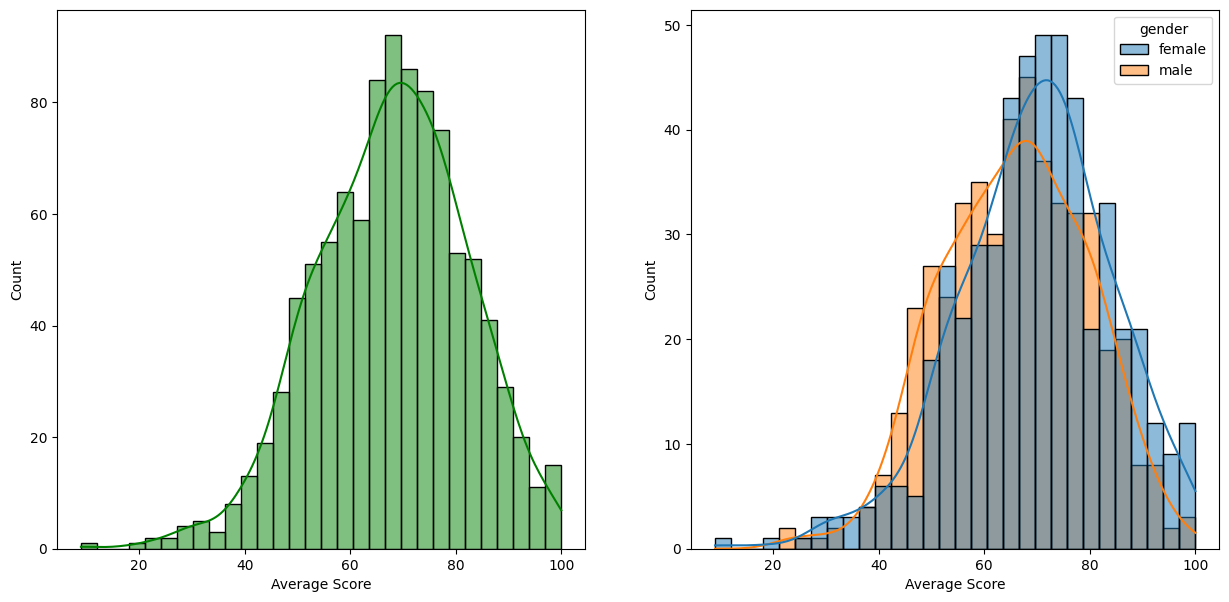

In [22]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average Score',bins=30,kde=True,color='g',hue='gender')
plt.show()

Checking with Total Score 


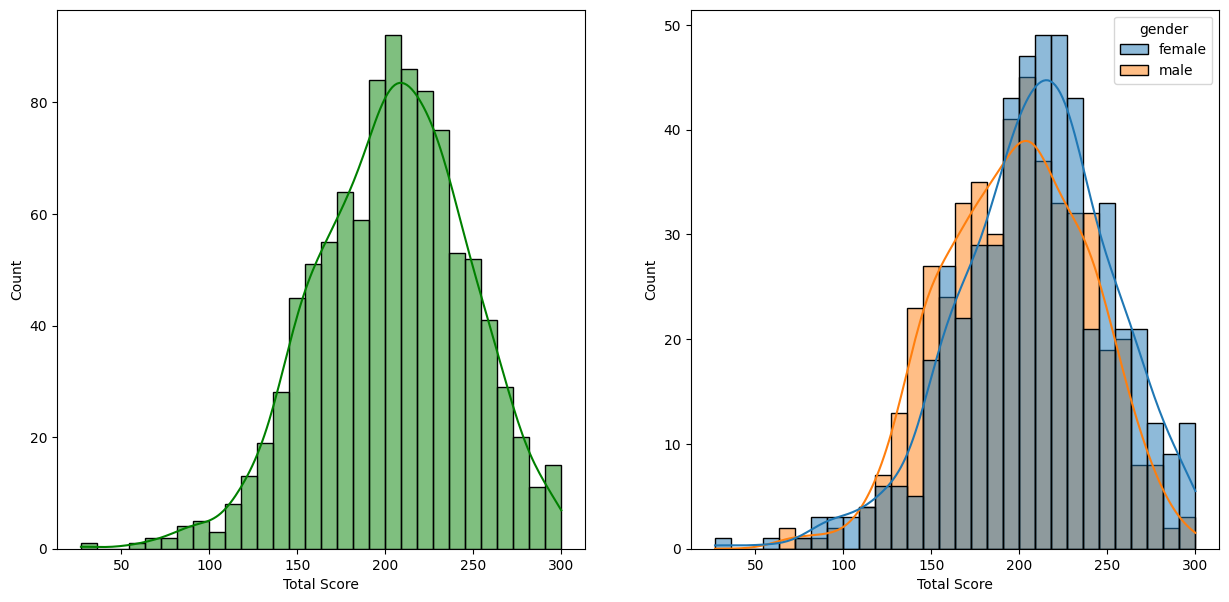

In [23]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total Score',bins=30,kde=True,color='g',hue='gender')
plt.show()

Female Gender is performing Well Compared to male

Now checking with Parental Education factor 

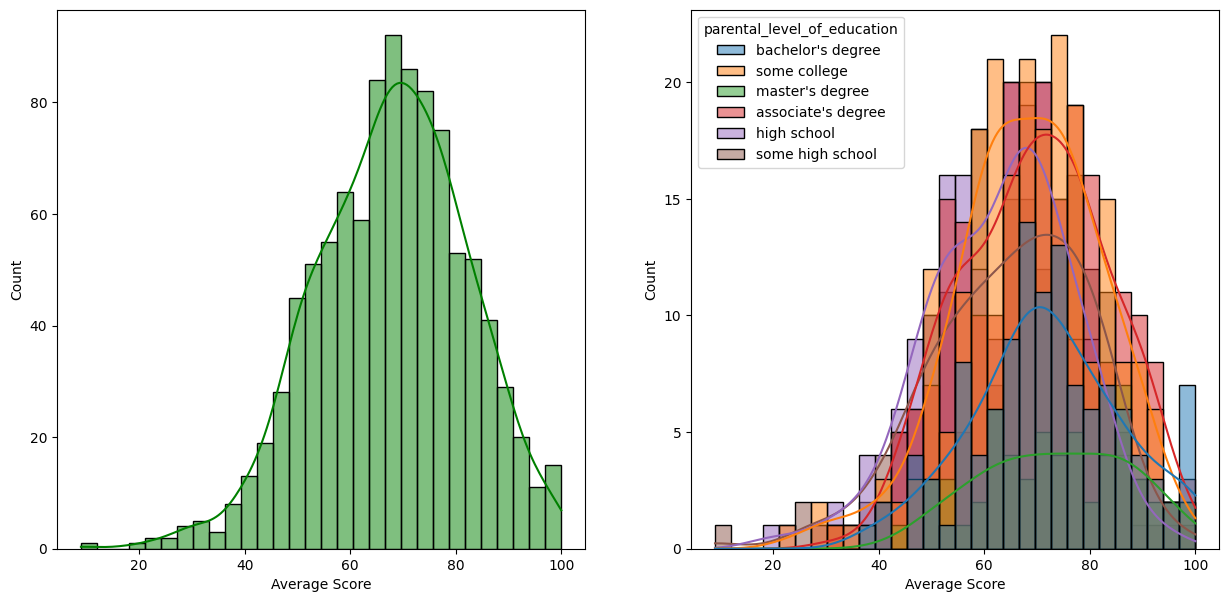

In [25]:
#parental_level_of_education
fig,axes=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average Score',bins=30,kde=True,color='g',hue='parental_level_of_education')
plt.show()